### Mini Assignment 4: Implementing a Quicksort Algorithm
##### Notebook Created by: Jacob Kreider

In this notebook, I will compare the performance of the quick sort algorithm described in 
Chapter 4 of *Grokking Algorithms* by Aditya Y. Bhargava (2016) with the built-in sorting algorithm shipped with the Pandas package in Python.

To get an understanding of how reliable each algorithm will perform, we ran 1,000 iterations of each sort method and took the average time. Results can be found below.

In [0]:
from numpy.random import seed
from numpy.random import randint
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import string, random

In [0]:
#Begin with the base code for quick sort as described in chapter 4 of Grokking Algorithms (Bhargava 2016).

def quicksort(array):
    if len(array) <2:
        return array #Base case: arrays with 0 or 1 elements are already sorted
    else:
        pivot = array[0] #Recursive case. NOTE: always starting with index 0 is not efficient
        less = [i for i in array[1:] if i <= pivot] #sub-array of all elements less than pivot
        greater = [i for i in array[1:] if i > pivot] #sub-array of all elements greater than pivot
        
        return quicksort(less) + [pivot] + quicksort(greater)

    

In [0]:
#Generate first name by randomly picking ten characters (e.g. abcdefghij etc), 
#last name by randomly picking another ten characters (klmnopqrstu etc)
#and state should be any two letters state from 50 US stats (e.g. IL, CA, AZ etc), 
#you can store all 50 states in one array and then use that by randomly assigning a state to a person.

persons = [f'Person {i}' for i in range(1, 51)]

persons

firstNames = set()

while len(firstNames) <= 50:
    firstNames.add(''.join(random.sample(string.ascii_lowercase,10)).capitalize())


lastNames = set()
while len(lastNames) <= 50:
    lastNames.add(''.join(random.sample(string.ascii_lowercase,10)).capitalize())


#FYI, for anyone that reads this, I found this array at 
# https://gist.github.com/JeffPaine/3083347#file-us_state_abbreviations-py
#Makes it much easier than typing them all out in the future!


states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [4]:
#Create a 'person' data structure (use arrays or lists or dictionary) that has first name, 
#last name, and address (address should be only two characters state e.g. IL, CA, AZ, TX etc.).

people = dict(zip(persons,zip(firstNames, lastNames,states)))
peopleDF = pd.DataFrame.from_dict(people, orient = 'index')
peopleDF.columns = ['First Name', 'Last Name', 'State']
peopleDF



,First Name,Last Name,State
Person 1,Jcixnkltpv,Guxcsrnqjl,AL
Person 2,Ixltsaevyr,Rbgnocepyx,AK
Person 3,Qtkvxhpnoe,Tarhgibkvm,AZ
Person 4,Detaiubgwn,Gfmqntoecj,AR
Person 5,Ldyvsgeikz,Tosjmxykpa,CA
Person 6,Jinxhzfrbc,Sixokltjpr,CO
Person 7,Bcuajhltyv,Yaojlcfzdu,CT
Person 8,Wpngocihdq,Jnequorafl,DE
Person 9,Pihosekacy,Pbreqdyljz,FL
Person 10,Uixqohtbea,Nykupmbwlc,GA


In [8]:
#Once the data is ready, use quicksort to sort the data by first name, 
#then last name, and then state.
#Use dataframe to output the sorted result set

start = time.clock()
for i in range(1000):
    sortedData = peopleDF.apply(quicksort, 0)
stop = time.clock()

quickTime = (stop - start)/1000

sortedData


,First Name,Last Name,State
Person 1,Axjbpevswh,Aybsgurphw,AK
Person 2,Bcuajhltyv,Bjdgunzxve,AL
Person 3,Bnusrctxpw,Bquxnjseli,AR
Person 4,Detaiubgwn,Dyihevmocl,AZ
Person 5,Dpohxsrtfq,Edxuwbvgsh,CA
Person 6,Dracyvpxmh,Ekmxuvinwy,CO
Person 7,Enkdifwrxj,Eptdnyhzfa,CT
Person 8,Eyoxtklpqr,Frtpnvuxjk,DE
Person 9,Fdtgczauhy,Fzaoqyemkb,FL
Person 10,Ftexkwuroi,Gfmqntoecj,GA


In [0]:
#Capture quicksort time, then use other sorting algorithms on the same data set 
#e.g. merge sort, bubble sort, insertion sort etc (if you don't know them, Google 
#them and use their code from internet).

start = time.clock()
for i in range(1000): #running the function 1K times to take the average time for all runs
    sortedData = peopleDF.sort_values(by = ['First Name', 'Last Name', 'State'])
stop = time.clock()
pandaTime = (stop - start)/1000




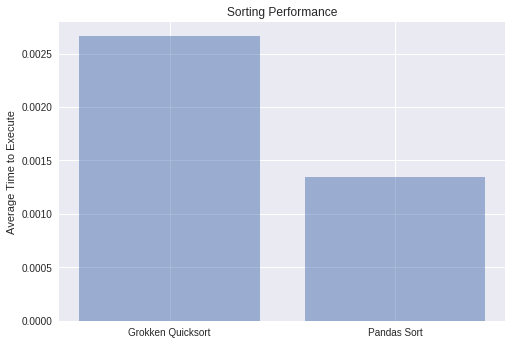

In [7]:
#Capture time for every sorting algorithm that you have used (minimum is to use 
#any two including quicksort) and then create a graph comparing times for all of 
#the algorithms that you have used

objects = ('Grokken Quicksort', 'Pandas Sort')
y_pos = np.arange(len(objects))
performance = [quickTime, pandaTime]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Time to Execute')
plt.title('Sorting Performance')
 
plt.show()

## Executive Summary

Running an algorithm once does not often give a true picture of its efficiency. A single claculation of runtime can often produce misleading results. For instance, when we timed the above sorting algorithms several times in a row, each proved the fastest on individual runs, with no clear indication as to why.

To smooth the results and understand which one delivers the most efficiency in the long run, we ran each 1,000 times and took an average of the results. By doing so, we were able to show that, on balance, the built-in Pandas sorting algorithm performs better over time.

